<a href="https://colab.research.google.com/github/rookasrudzianskas/PytorchModels/blob/master/12_open_source_ML_Model_NN_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
import sklearn

In [134]:
from sklearn.datasets import make_circles


# Make 1000 samples 
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

In [135]:
len(X), len(y)

(1000, 1000)

In [136]:
print(f"First 5 samples of x: {X[:5]}")
print(f"First 5 sameples of Y: {y[:5]}")

First 5 samples of x: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 sameples of Y: [1 1 1 1 0]


In [137]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [138]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


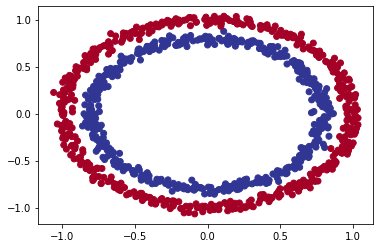

In [139]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

In [140]:
X.shape, y.shape

((1000, 2), (1000,))

In [141]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [142]:
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


In [143]:
import torch
torch.__version__

'1.12.1+cu113'

In [144]:
type(X)

numpy.ndarray

In [145]:
# Turn data into tensors
# Otherwise this causes issues with computations later on
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# View the first five samples
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]), tensor([1., 1., 1., 1., 0.]))

In [146]:
X.dtype, y.dtype

(torch.float32, torch.float32)

In [147]:
# split data into the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 0.2 means 20% will be test, and 80 will be train

In [148]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [149]:
n_samples

1000

In [150]:
import torch 
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [151]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [152]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # Create two nn linear layers capable of handling shapes of my data
    # take two numbers of x, perform a linear regression formula and it is going to upscale to 5 features
    # it gets 5 opportunities to learn the pattern in here, instead of two
    # self.layer_1 = nn.Linear(in_features=2, out_features=5) #takes in 2 features, and upscales to 5 features
    # self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previrous outputs and outputs a single feature

    self.two_linear_layers = nn.Sequential(
        nn.Linear(in_features=1, out_features=5),
        nn.Linear(in_features=5, out_features=1)
    )
    # Define a forward method, that outlines the forward pass
  def forward(self, x):
    # return self.layer_2(self.layer_1(x)) # x gos into layer 1 -> layer 2 it is going to go to output
    return two_linear_layers(x)

model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=1, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [153]:
device

'cuda'

In [154]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [155]:
model_0 = nn.Sequential(nn.Linear(in_features=2, out_features=5),
                        nn.Linear(in_features=5, out_features=1)
                        ).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [156]:
# Make some predictions with the modal

In [157]:
model_0.state_dict()

OrderedDict([('0.weight', tensor([[ 0.1495, -0.1803],
                      [ 0.4215,  0.4807],
                      [-0.5128, -0.3775],
                      [ 0.6475, -0.2386],
                      [-0.2507, -0.6842]], device='cuda:0')),
             ('0.bias',
              tensor([-0.4049,  0.1766, -0.0933, -0.5133,  0.0166], device='cuda:0')),
             ('1.weight',
              tensor([[-0.3055, -0.3794, -0.2463, -0.3914, -0.2848]], device='cuda:0')),
             ('1.bias', tensor([0.4470], device='cuda:0'))])

In [158]:

with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Lenght of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Leng of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"First 10 predictions, {torch.round(untrained_preds[:10])}")
print(f"First 10 labels: {y_test[:10]}")

Lenght of predictions: 200, Shape: torch.Size([200, 1])
Leng of test samples: 200, Shape: torch.Size([200, 2])
First 10 predictions, tensor([[1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0')
First 10 labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [159]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

In [160]:
# loss_fn = nn.BCELoss() requires inputs to have gone throught sigmoid function prior
loss_fn = nn.BCEWithLogitsLoss() #BCE with logit loss = sigmoid activation function built in

# this is going to just do the learning, optimize the params to reach the zero
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [161]:
# Calculate the accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

In [162]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [163]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[0.9942],
        [0.9626],
        [0.8267],
        [1.0428],
        [0.4289]], device='cuda:0')

In [164]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [165]:
# Converting to probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.7299],
        [0.7236],
        [0.6956],
        [0.7394],
        [0.6056]], device='cuda:0')

In [166]:
# find the prediction labels
y_preds = torch.round(y_pred_probs)
# >= 0.5 = 1
# < 0.5 = 0
# In full logits -> pred probs - > pred labels
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for eq
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Gets rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 1.], device='cuda:0')

In [167]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [168]:
# torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_0.train()

  # Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probs -< pred labels

  # loss, accuracy
  loss = loss_fn(y_logits, y_train)

  # acc
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  # optimizer zero grad
  optimizer.zero_grad()
  # loss backward
  loss.backward()

  # Optimizer step gradient descent
  optimizer.step()

  # Testing
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # Calculate the test loss
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)


    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.76179, Acc: 50.00% | Test loss: 0.76131, test acc: 50.00%
Epoch: 10 | Loss: 0.72047, Acc: 50.00% | Test loss: 0.72209, test acc: 50.00%
Epoch: 20 | Loss: 0.70445, Acc: 50.00% | Test loss: 0.70664, test acc: 50.00%
Epoch: 30 | Loss: 0.69805, Acc: 58.63% | Test loss: 0.70035, test acc: 56.00%
Epoch: 40 | Loss: 0.69543, Acc: 53.62% | Test loss: 0.69772, test acc: 54.00%
Epoch: 50 | Loss: 0.69432, Acc: 52.25% | Test loss: 0.69656, test acc: 50.00%
Epoch: 60 | Loss: 0.69382, Acc: 51.62% | Test loss: 0.69602, test acc: 49.00%
Epoch: 70 | Loss: 0.69357, Acc: 51.00% | Test loss: 0.69574, test acc: 49.00%
Epoch: 80 | Loss: 0.69343, Acc: 50.50% | Test loss: 0.69558, test acc: 50.50%
Epoch: 90 | Loss: 0.69334, Acc: 50.75% | Test loss: 0.69546, test acc: 49.00%


In [169]:
# Make predictions, check why my model does not learn anything
import requests
from pathlib import Path

# Download the helper functions from repo, if it is not already downloaded
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Download helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


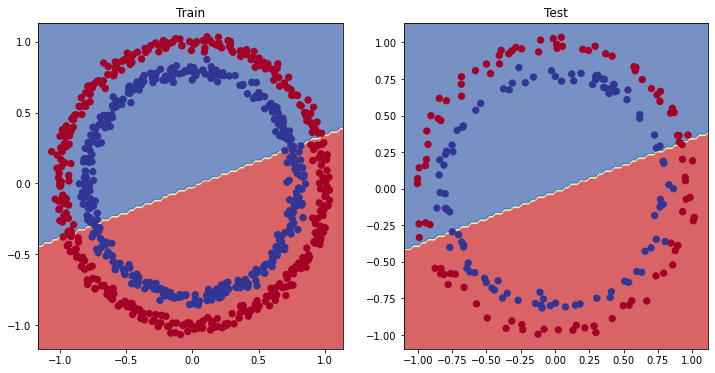

In [170]:
# Plot decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)